In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib
import missingno as msno

In [2]:
def loading_csv(csv_link, csv_name):
    destination = '/content/drive/MyDrive/SelfProject/loan_tap/data/' + csv_name
    urllib.request.urlretrieve(csv_link, destination)
    csv = pd.read_csv(destination)
    return csv

In [3]:
df_raw = loading_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921', 'loan_tap.csv')

In [5]:
pd.set_option('display.max_columns',None)
df_raw.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Overview

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<Axes: >

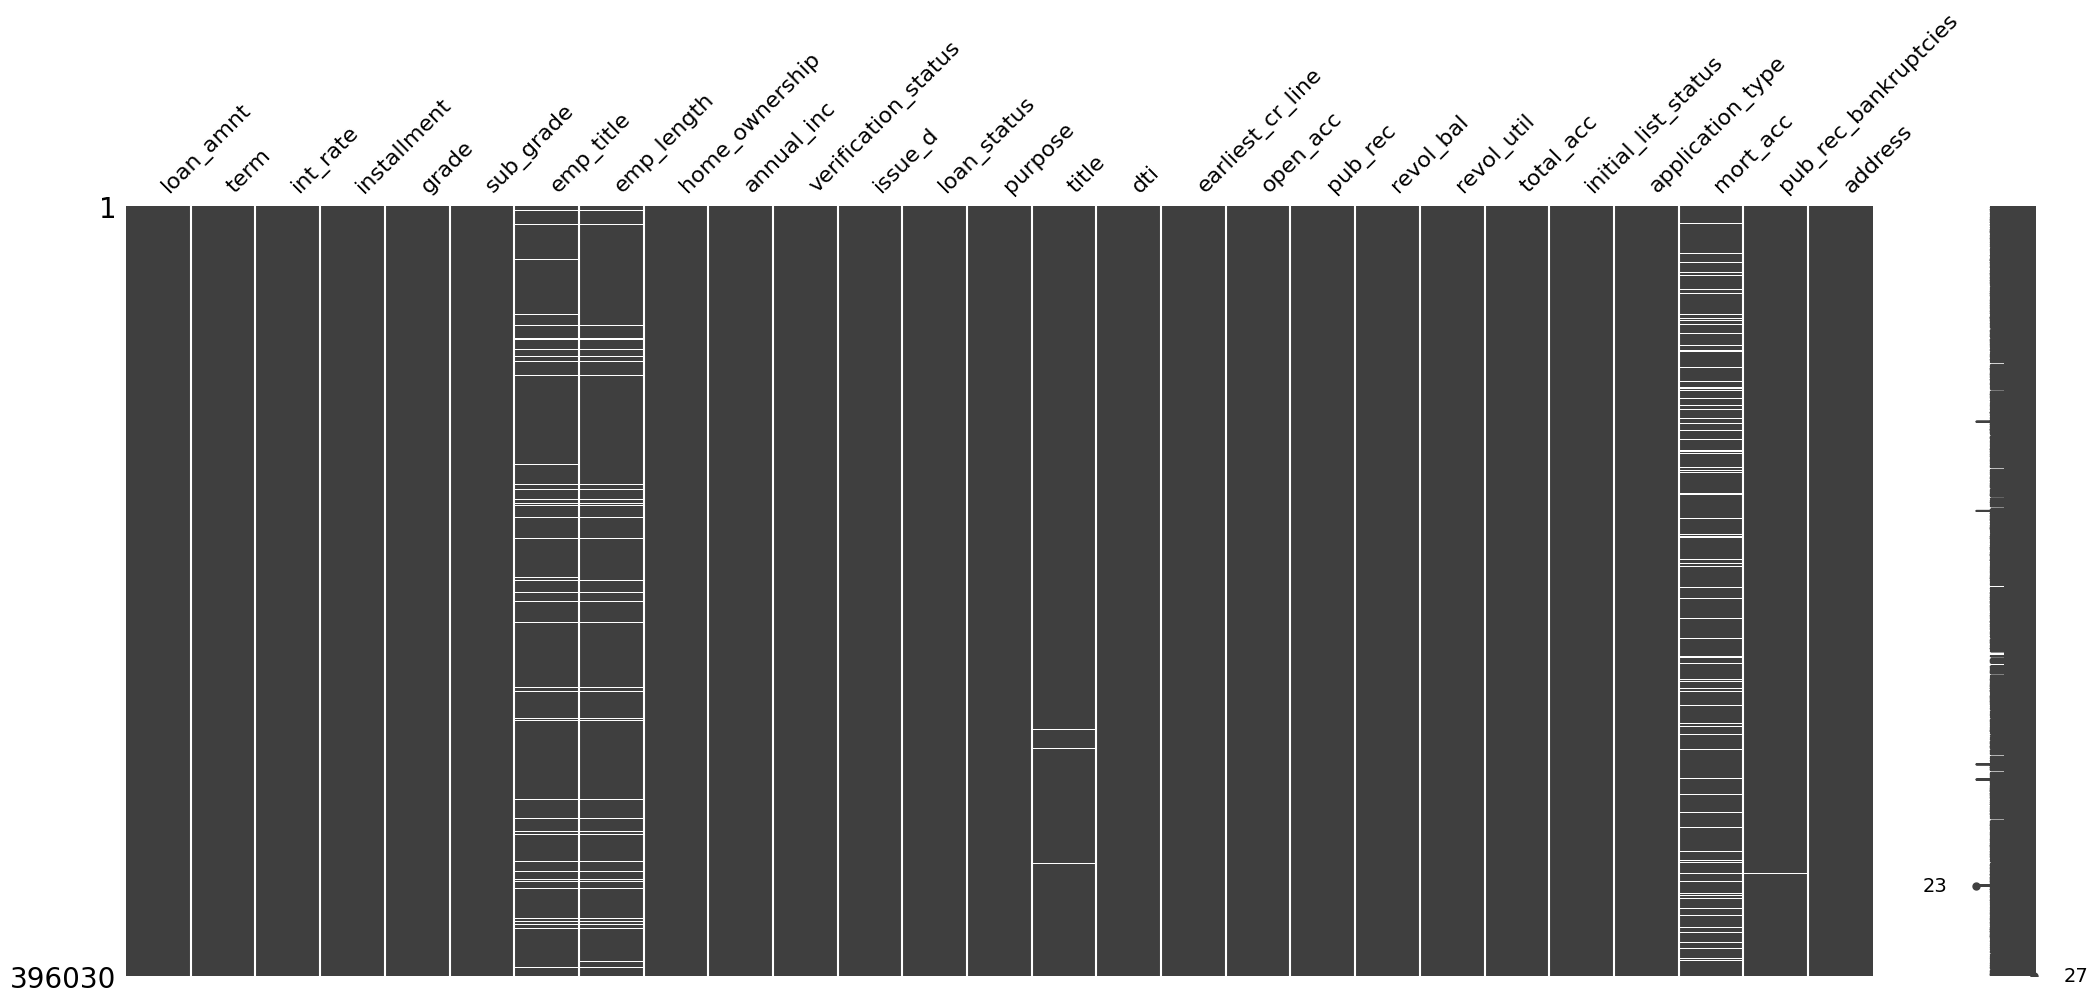

In [7]:
msno.matrix(df_raw)

In [8]:
df_raw.isna().mean().sort_values(ascending=False)

mort_acc                0.095435
emp_title               0.057892
emp_length              0.046211
title                   0.004431
pub_rec_bankruptcies    0.001351
revol_util              0.000697
loan_amnt               0.000000
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
address                 0.000000
dtype: float64

In [9]:
df_raw.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
df_raw.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [11]:
df_raw.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


#Exploratory Data Analysys

In [12]:
df = df_raw.copy()

In [13]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


## preliminary testing

In [14]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [15]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [16]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [17]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

As, we can see title's values are almost getting covered in purpose section. So, we are dropping the column title.

In [18]:
df.drop(['title'], axis=1, inplace=True)

In [19]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [20]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

## **Feature Engineering**

## emp_title

In [21]:
df['emp_title'].nunique()

173105

In [22]:
df['emp_title'] = df['emp_title'].astype('str')
df['emp_title'] = df['emp_title'].apply(lambda x : x.lower().strip())

In [23]:
word_list = list(df['emp_title'].apply(lambda x : x.split(' ')))

In [24]:
word_list[:10]

[['marketing'],
 ['credit', 'analyst'],
 ['statistician'],
 ['client', 'advocate'],
 ['destiny', 'management', 'inc.'],
 ['hr', 'specialist'],
 ['software', 'development', 'engineer'],
 ['office', 'depot'],
 ['application', 'architect'],
 ['regado', 'biosciences']]

In [25]:
flattened_list = []
for item in word_list:
  for element in item:
    flattened_list.append(element)
flattened_list =pd.Series(flattened_list)


In [26]:
len(flattened_list)

866619

In [27]:
flattened_list.value_counts().sort_values(ascending = False)[:50]

manager        38665
nan            22931
of             15801
sales           9588
assistant       9233
director        9196
analyst         7602
specialist      7578
engineer        7428
supervisor      7422
senior          7287
service         7014
teacher         6544
officer         5724
driver          5476
nurse           5246
inc.            5238
inc             5185
technician      5185
&               4899
and             4563
services        4442
tech            4419
medical         4212
center          3954
coordinator     3944
operations      3883
office          3826
project         3767
operator        3680
associate       3520
school          3443
county          3413
health          3186
registered      3158
executive       3147
business        3122
lead            3060
systems         3059
hospital        3028
bank            3024
president       2986
consultant      2853
city            2826
general         2812
district        2742
account         2727
rn           

lets replace all the emp_title values which contain the string 'manager'. And again check.



In [28]:
def replace_manager(x):
  if 'manager' in x:
    return 'manager'
  else : return x

In [29]:
df['emp_title'] = df['emp_title'].apply(replace_manager)

In [30]:
df['emp_title']

0                        marketing
1                   credit analyst
2                     statistician
3                  client advocate
4          destiny management inc.
                    ...           
396025            licensed bankere
396026                       agent
396027                city carrier
396028        gracon services, inc
396029    internal revenue service
Name: emp_title, Length: 396030, dtype: object

In [31]:
word_list = list(df['emp_title'].apply(lambda x : x.split(' ')))
flattened_list = []
for item in word_list:
  for element in item:
    flattened_list.append(element)
flattened_list =pd.Series(flattened_list)

In [32]:
len(flattened_list)

818882

### Lets look at the different words and again rpelace

In [33]:
flattened_list.value_counts().sort_values(ascending = False)[:50]

manager          39831
nan              22931
of               15496
director          9176
assistant         7661
analyst           7589
specialist        7563
sales             7504
supervisor        7404
engineer          7392
teacher           6543
senior            6247
service           6117
officer           5701
driver            5463
inc.              5235
inc               5183
technician        5179
nurse             5003
&                 4651
tech              4385
and               4273
medical           4180
services          4108
coordinator       3933
center            3753
operator          3678
school            3437
county            3408
associate         3401
health            3134
registered        3126
executive         3089
hospital          3019
lead              3004
bank              2964
president         2946
systems           2941
consultant        2836
city              2802
university        2557
rn                2556
the               2534
administrat

In [34]:
flattened_list.value_counts().sort_values(ascending = False)[50:100]

security          2332
us                2311
group             2272
clerk             2257
department        2226
customer          2187
district          2173
sr.               2145
llc               2143
vice              2129
support           2115
police            2103
software          2006
company           2000
it                1978
accountant        1927
administrative    1890
care              1862
office            1840
truck             1753
corporation       1674
mechanic          1668
maintenance       1630
representative    1622
agent             1619
insurance         1593
rep               1474
united            1431
sr                1423
public            1370
schools           1357
                  1344
home              1337
marketing         1336
system            1336
account           1325
army              1325
worker            1317
technical         1312
staff             1302
ii                1292
quality           1246
therapist         1220
production 

In [35]:
flattened_list.value_counts().sort_values(ascending = False)[100:150]

field            1161
team             1154
solutions        1140
program          1139
project          1138
principal        1124
development      1109
leader           1103
chief            1103
developer        1062
international    1049
loan             1044
banker           1038
legal            1038
admin            1035
education        1033
corp             1032
community        1023
secretary         994
regional          988
air               988
college           967
foreman           966
general           960
engineering       956
carrier           953
national          943
technology        942
american          926
-                 925
dept              924
designer          924
research          906
dental            900
control           896
accounting        892
social            891
controller        886
clinical          870
healthcare        865
deputy            858
data              851
counselor         838
human             832
professor         827
warehouse 

In [36]:
flattened_list.value_counts().sort_values(ascending = False)[700:750]

grumman         132
phoenix         132
plumbing        131
charter         131
honda           131
chain           131
land            131
young           131
creek           131
spa             131
merchandiser    131
work            130
mobile          130
jersey          130
superior        130
med             130
fund            130
leasing         130
inn             129
major           129
radiologic      128
hotels          128
sears           128
svp             128
employee        128
floor           127
pa              127
fidelity        127
claim           127
imaging         127
northrop        127
dr.             126
waste           126
buy             125
ltd             125
assistance      125
audit           125
grocery         124
corps           124
president,      124
el              123
fitness         122
brown           122
pathologist     122
customs         122
sanitation      122
street          122
escrow          122
faculty         122
employment      121


Let's now replace 'director','analyst','engineer', 'teacher','officer','driver','nurse','technician','medical', 'health','hospital','executive','president','consultant','university','financial','business','security','clerk','police','accountant','therapist','marketing','attorney','principal','developer','banker','secretary','professor','physician','government','pharmacist','cashier','ceo','cook','media','scientist','navy','airlines','flight','firefighter','bookkeeper','bartender','carpenter','military','paramedic','educator','student','investigator','psychologist','doctor','pathologist'

### Replacement

In [37]:
words = ['director','analyst','engineer', 'teacher','officer','driver','nurse','technician','medical', 'health','hospital','executive','president','consultant','university','financial','business','security','clerk','police','accountant','therapist','marketing','attorney','principal','developer','banker','secretary','professor','physician','government','pharmacist','cashier','ceo','cook','media','scientist','navy','airlines','flight','firefighter','bookkeeper','bartender','carpenter','military','paramedic','educator','student','investigator','psychologist','doctor','pathologist']

In [38]:
def replace_word(x):
  if item in x:
    return item
  else : return x

In [39]:
%timeit
for item in words:
  df['emp_title'] = df['emp_title'].apply(replace_word)


In [40]:
word_list = list(df['emp_title'].apply(lambda x : x.split(' ')))
flattened_list = []
for item in word_list:
  for element in item:
    flattened_list.append(element)
flattened_list =pd.Series(flattened_list)

In [41]:
len(flattened_list)

686277

In [42]:
flattened_list.value_counts().sort_values(ascending = False)[:50]

manager          39831
nan              22931
director          9936
of                9661
engineer          8520
analyst           7807
supervisor        7076
teacher           6816
specialist        6804
sales             5977
officer           5767
driver            5726
nurse             5119
service           5118
technician        5096
inc               4936
inc.              4933
assistant         4634
health            4159
medical           4109
tech              4107
&                 3910
operator          3636
coordinator       3589
and               3266
president         3164
school            3061
county            3047
hospital          3039
bank              2913
consultant        2913
services          2891
senior            2774
executive         2607
city              2562
associate         2530
rn                2466
owner             2445
administrator     2383
clerk             2299
university        2213
lead              2201
the               2183
llc        

In [43]:
df['emp_title'].nunique()

112042

In [44]:
df['emp_title'].value_counts()

manager                   39831
nan                       22927
director                   9936
engineer                   8520
analyst                    7807
                          ...  
ddepartment of defence        1
sutures                       1
lab techologist               1
tufting                       1
gracon services, inc          1
Name: emp_title, Length: 112042, dtype: int64

### Replacing emp_titles with frequency less than 500, with 'others'

In [45]:
df['emp_title'].value_counts().lt(100)

manager                   False
nan                       False
director                  False
engineer                  False
analyst                   False
                          ...  
ddepartment of defence     True
sutures                    True
lab techologist            True
tufting                    True
gracon services, inc       True
Name: emp_title, Length: 112042, dtype: bool

In [46]:
100 / df.shape[0]

0.0002525061232734894

In [47]:
df.loc[df['emp_title'].map(df['emp_title'].value_counts().lt(100)), 'emp_title'] = 'Miscellanous'

In [48]:
df['emp_title'].value_counts()

Miscellanous           187359
manager                 39831
nan                     22927
director                 9936
engineer                 8520
                        ...  
loan processor            102
contract specialist       102
office assistant          101
carrier                   100
phlebotomist              100
Name: emp_title, Length: 207, dtype: int64

In [49]:
len(df['emp_title'].value_counts())

207

So, we have 207 unique values in emp_title column. We can later frequency encode this.



## Address

In [50]:
df['address'].value_counts()

USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

In [51]:
df['address'].nunique()

393700

In [52]:
def extract_zip(x):
  return x.strip()[-8:]
extract_zip('   asdasdads asdad as asd 0789asd 9a 65485    ')

'9a 65485'

In [53]:
df['address'] = df['address'].apply(lambda x : x.strip()[-8:])

In [54]:
df['address'].nunique()

540

In [55]:
df['address'][:10]

0    OK 22690
1    SD 05113
2    WV 05113
3    MA 00813
4    VA 11650
5    DE 30723
6    TX 22690
7    AE 30723
8    AP 22690
9    VA 00813
Name: address, dtype: object

## Impact of the categorical features on the target variable

In [56]:
def plot_crosstab(column):
    crosstab = pd.crosstab(index = df[column],columns = df['loan_status'], normalize='index')
    a = crosstab.plot.bar()
    a.set_ylabel('percentage of total')
    plt.show()

In [57]:
cols = df.select_dtypes(include=['object']).drop(['loan_status','issue_d','earliest_cr_line'], axis=1).columns
cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

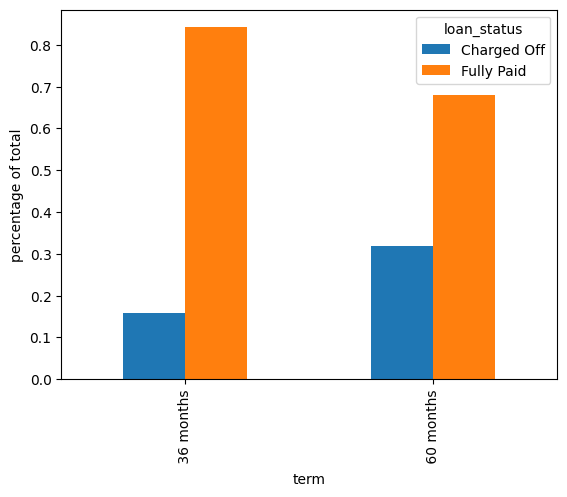

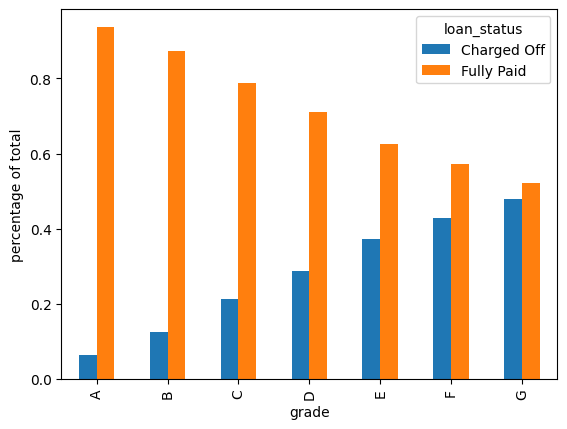

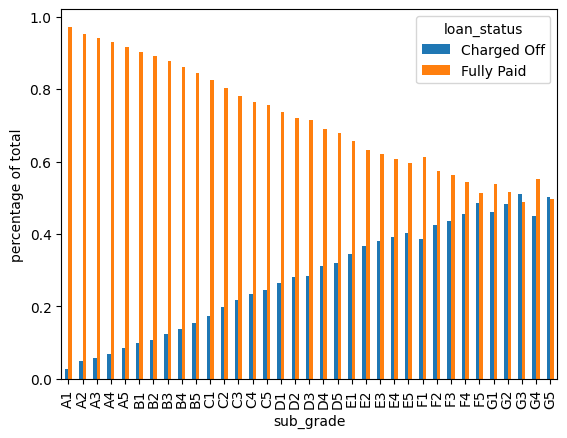

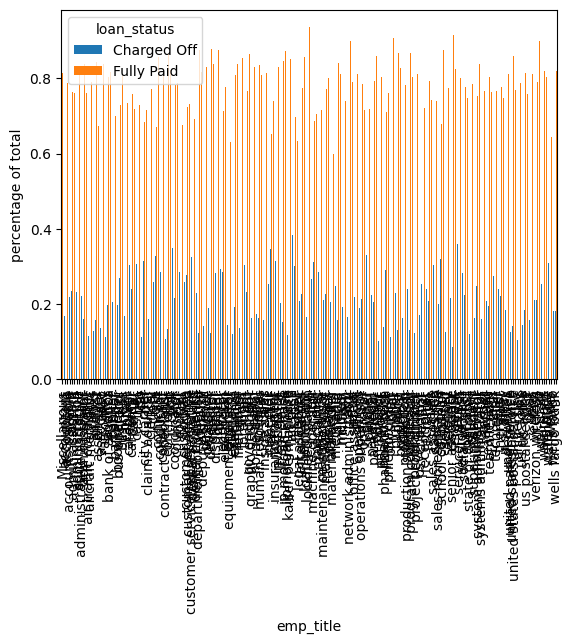

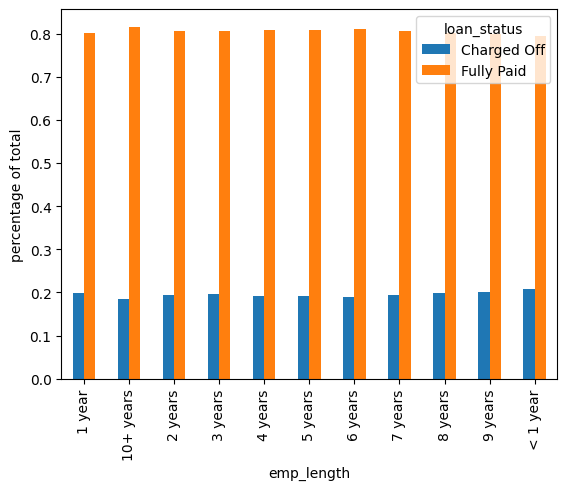

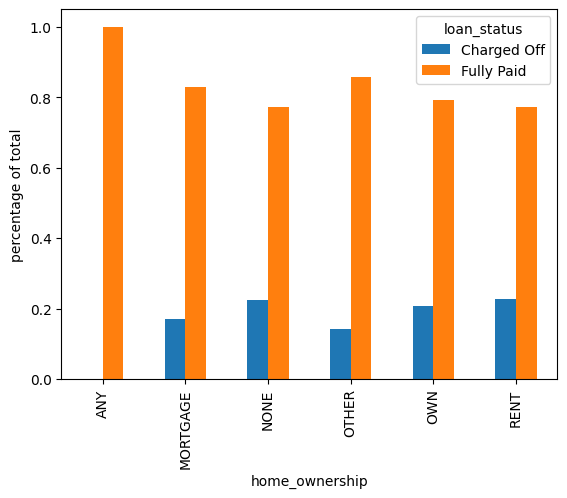

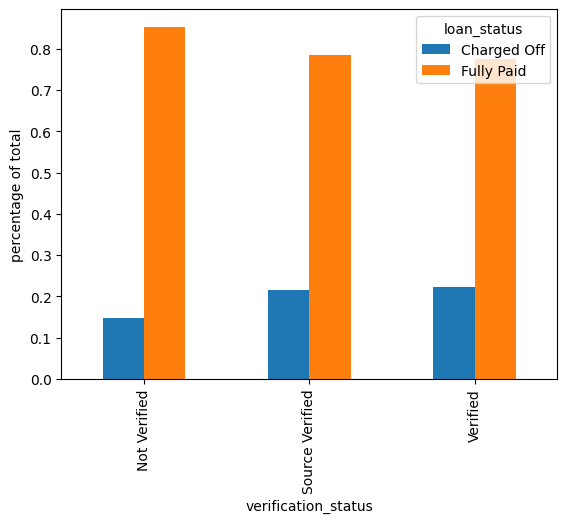

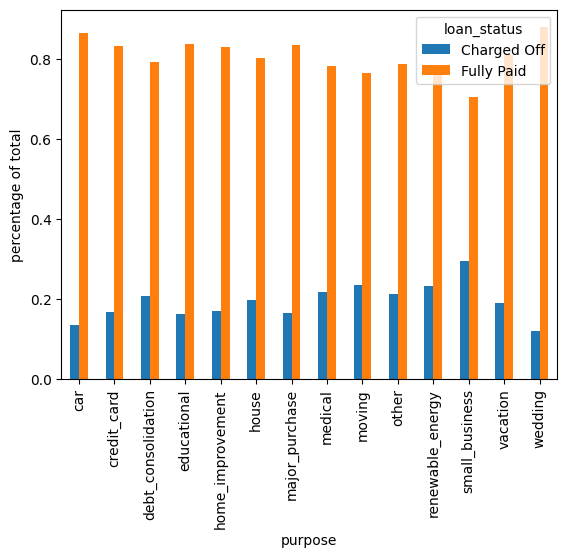

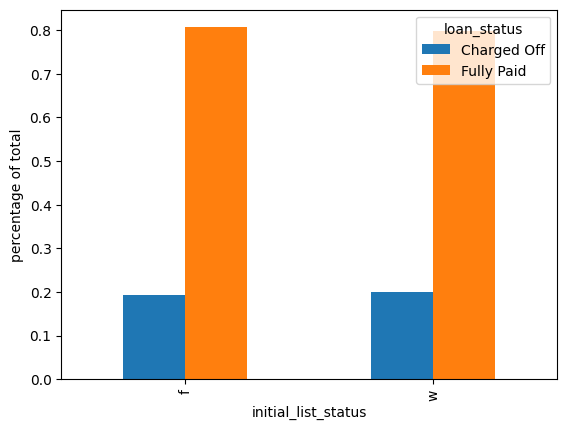

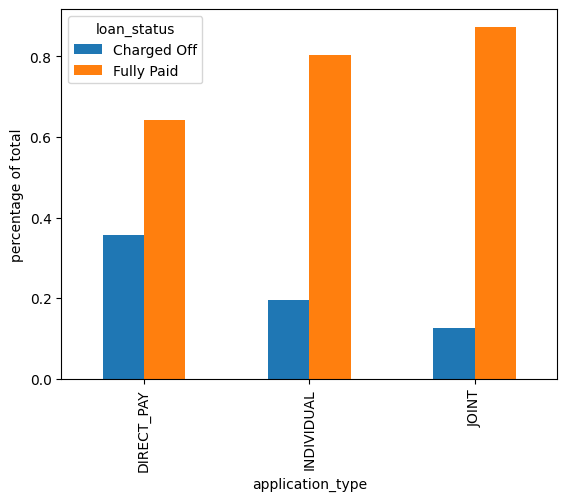

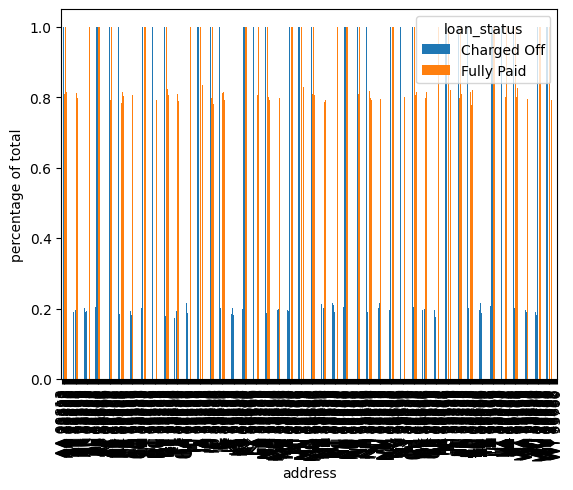

In [58]:
for col in cols:
    plot_crosstab(col)

From the observation as we can see, emp_length and initial_list_status are not affecting the target variable at all. So these will not affect the target variable. So, lets dop the columns

In [59]:
df.drop(['initial_list_status','emp_length'], axis=1, inplace=True)

## Comparison of Numeric Sample Data for Different Loan Status

In [60]:
df.select_dtypes(include = ['float64','int64']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

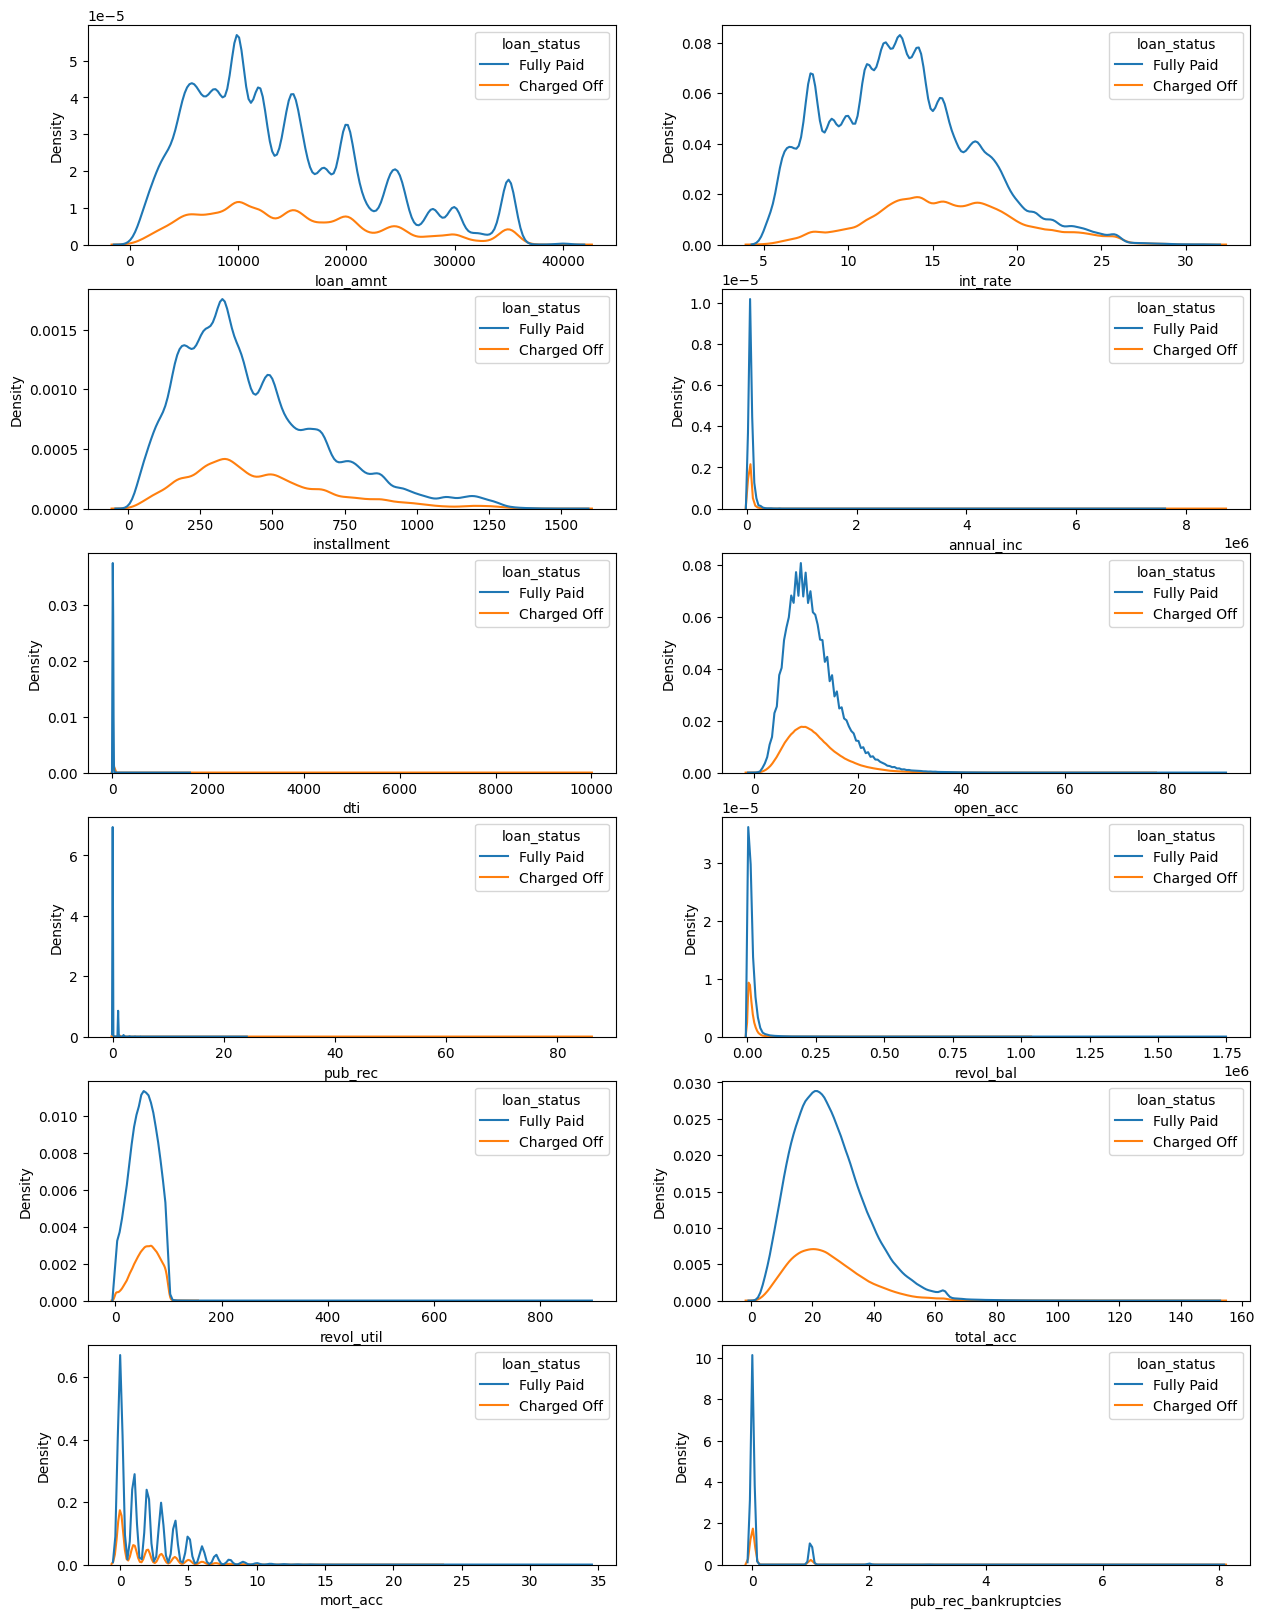

In [61]:
plt.figure(figsize=(15,20))
for i,column in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    plt.subplot(6,2,i+1)
    sns.kdeplot(data=df, x = column, hue = 'loan_status')

As, we can see that the two samples that is for loan status being positive as well as negative, the distributions do not seem to have statistically significant differences, so lets perfom hypothesis tests for these samples to verify if there really is any differences or not.

In [62]:
import random
from scipy.stats import shapiro, kstest
Shapiro_stats = []
Shapiro_p = []
ks_stats = []
ks_p = []
for column in df.select_dtypes(include=['float64','int64']).columns:
    mort_acc = random.choices(list(df[column]), k=5000)
    Shapiro_statistics, Shapiro_p_values = shapiro(mort_acc)
    ks_statistics, ks_p_values = kstest(mort_acc,'norm')
    Shapiro_stats.append(Shapiro_statistics)
    Shapiro_p.append(Shapiro_p_values)
    ks_stats.append(ks_statistics)
    ks_p.append(ks_p_values)
normality_test = pd.DataFrame({'Columns' : df.select_dtypes(include=['float64','int64']).columns,
                                    'Shapiro_statistics' : Shapiro_stats,
                                    'Shapiro_p_values':Shapiro_p,
                                    'ks_statistics' : ks_stats,
                                    'ks_p_values' : ks_p})
normality_test.sort_values(by='Shapiro_p_values',ascending=False)

,Columns,Shapiro_statistics,Shapiro_p_values,ks_statistics,ks_p_values
8,revol_util,NaN,1.000000e+00,NaN,NaN
10,mort_acc,NaN,1.000000e+00,NaN,NaN
11,pub_rec_bankruptcies,NaN,1.000000e+00,NaN,NaN
4,dti,0.988857,1.928305e-19,0.979682,0.0
1,int_rate,0.982835,3.571006e-24,1.000000,0.0
9,total_acc,0.959575,3.438084e-35,0.998968,0.0
2,installment,0.940291,6.278798e-41,1.000000,0.0
0,loan_amnt,0.937589,1.312176e-41,1.000000,0.0
5,open_acc,0.933944,1.729202e-42,0.995650,0.0
3,annual_inc,0.785846,0.000000e+00,1.000000,0.0


As expected, revol_util, mort_acc and pub_rec_bankruptcies distributions are not from normally distributed population.

#### Mean Comparison
Null Hypothesis : Two samples do not have different means.

In [63]:
from scipy import stats
stats_list = []
p_values = []
for column in df.select_dtypes(include=['float64','int64']).drop(['revol_util','mort_acc','pub_rec_bankruptcies'], axis=1).columns:
    ttest_stat,ttest_p_value = stats.ttest_ind(random.choices(list(df[df['loan_status'] == 'Fully Paid'][column]), k=5000), random.choices(list(df[df['loan_status'] == 'Charged Off'][column]),k=5000), permutations=10000)
    stats_list.append(ttest_stat)
    p_values.append(ttest_p_value)
ttests = pd.DataFrame({'Columns' : df.select_dtypes(include=['float64','int64']).drop(['revol_util','mort_acc','pub_rec_bankruptcies'], axis=1).columns,
                        'ttest_Statistics' : stats_list,
                        'ttest_p_values' : p_values})
ttests.sort_values(by = 'ttest_p_values', ascending = False)

,Columns,ttest_Statistics,ttest_p_values
5,open_acc,-1.192800,0.247675
7,revol_bal,1.678112,0.095090
8,total_acc,2.656587,0.009099
6,pub_rec,-2.847373,0.003900
0,loan_amnt,-7.087888,0.000100
1,int_rate,-32.064120,0.000100
2,installment,-5.063219,0.000100
3,annual_inc,8.744108,0.000100
4,dti,-16.588374,0.000100


So, for **pub_rec, total_acc and revol_bal**, Null hypothesis is True, that they do not have different mean ie, they **DO NOT AFFECT** the result.

#### Correlation in Numeric Variables

<Axes: >

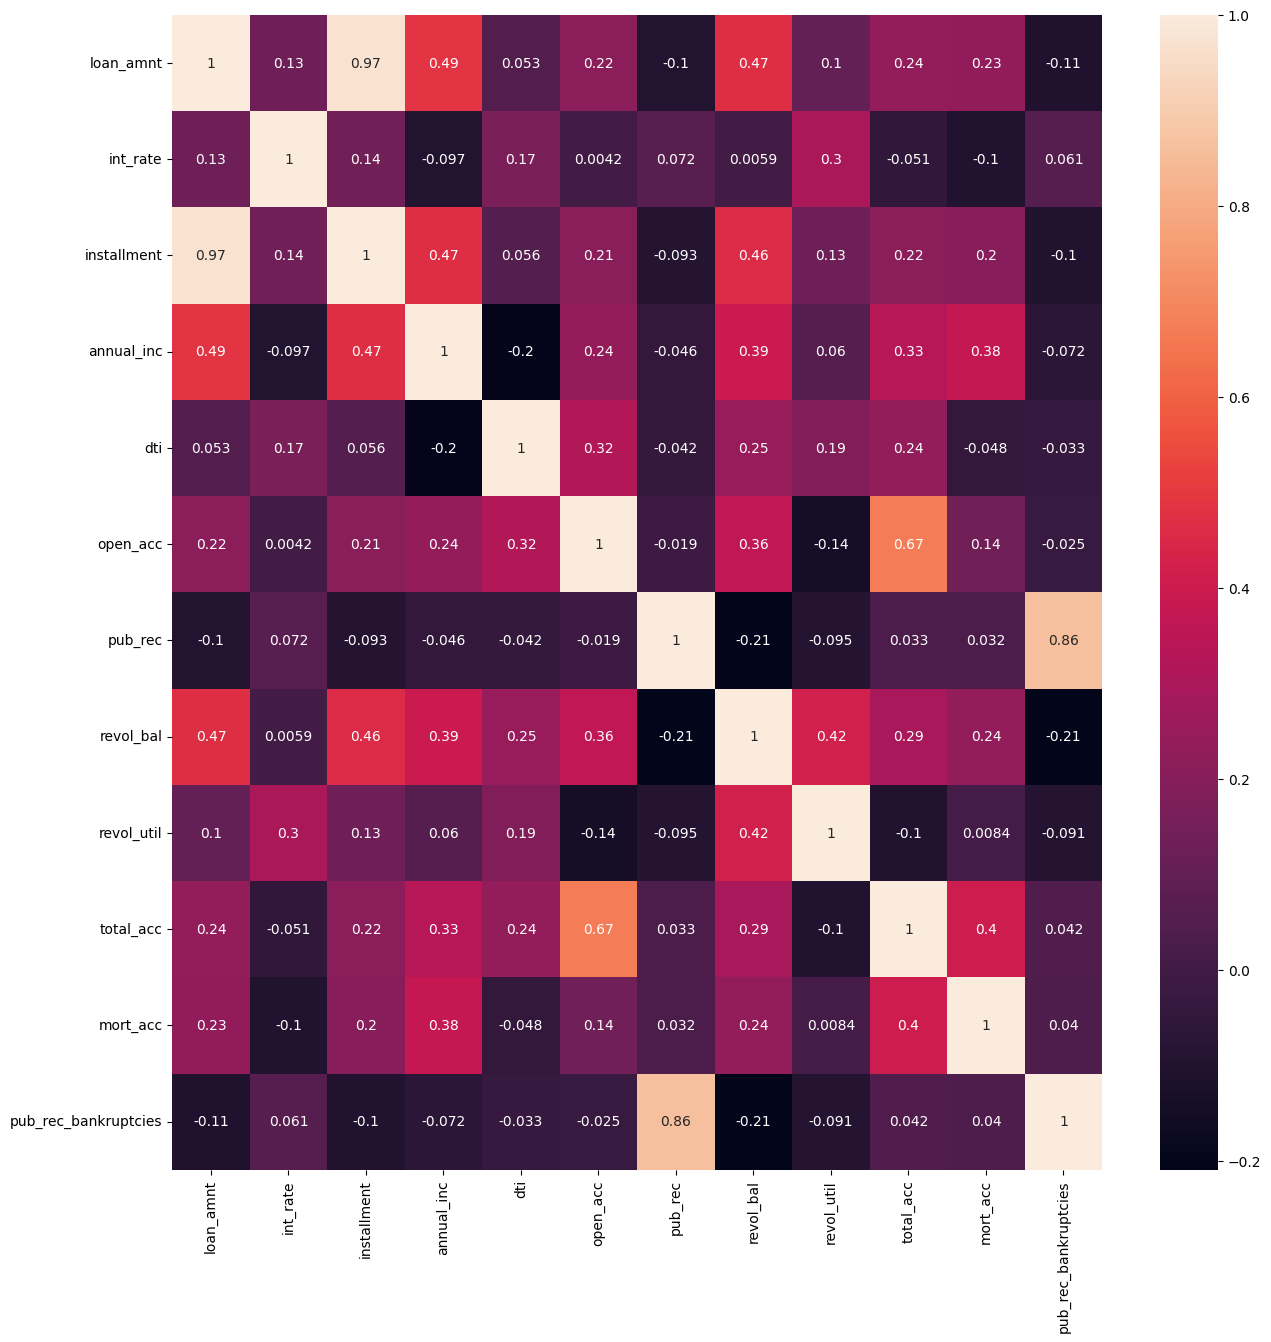

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include = ['float64','int64']).corr(method='spearman'), annot=True)

So, among loan amount and loan installment any one can be dropped. We are dropping loan_amount here.
* Now, there is a high correlation between pub_rec and pub_rec_bankruptcies as well. But, pub_rec covers pretty much all kinds of negative credit information like late payments, bad civil score or partially repayed loans and all.
* But public record bankruptcies cover the cases where only if the person is complete bankrupt and not able to repay the loans at all.

In [65]:
df.drop(['loan_amnt'], axis=1, inplace=True)

In [66]:
df.head()

,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address
0,36 months,11.44,329.48,B,B4,marketing,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,OK 22690
1,36 months,11.99,265.68,B,B5,analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,SD 05113
2,36 months,10.49,506.97,B,B3,Miscellanous,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,WV 05113
3,36 months,6.49,220.65,A,A2,Miscellanous,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,MA 00813
4,60 months,17.27,609.33,C,C5,Miscellanous,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,VA 11650


In [67]:
df.to_csv("/content/drive/MyDrive/SelfProject/loan_tap/eda_done.csv")

## End

## csdf sdfsd f

## asad asd